# Importing libraries

In [111]:
# Essentials
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

# Models
from sklearn.cluster import KMeans, AgglomerativeClustering

# Misc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Warning
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [112]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis (EDA)

Data shape

In [113]:
data.shape

(2240, 29)

Data Info

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Checking duplicates

In [115]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Checking missing values

In [116]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Data describe

In [117]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Overview the categorical attributes

In [118]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [119]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Correlation

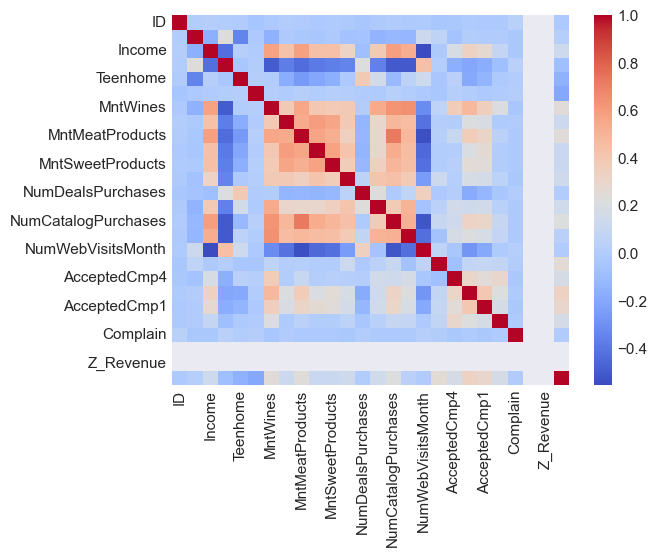

In [120]:
# Non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Droping non-numeric columns
numeric_data = data.drop(columns=non_numeric_columns)

# Correlation matrix
corr = numeric_data.corr()
sns.heatmap(corr, cmap="coolwarm");

Both Z_CostContact and Z_Revenue variables have zero correlation with all other variables because there is no variability in their values, as they have only one value. I will remove these columns in the Data Preprocessing part as they don't contain any useful information for the analysis.

# Data Preprocessing

Missing values

In [121]:
data = data.dropna()

print("Number of missing values in data: ")
data.isnull().sum().sum()

Number of missing values in data: 


0

Converting data types

In [122]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y", dayfirst=True)
data['Dt_Customer'].dtype

dtype('<M8[ns]')

# Feature Engineering

Adding new columns

In [123]:
AmountSpent = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
NumOfPurchases = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
AcceptedCampaignes = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
Children = ["Kidhome", "Teenhome"]

# Amountspent column
data["AmountSpent"] = data[AmountSpent].sum(axis=1)

# NumOfPurchases column
data["NumOfPurchases"] = data[NumOfPurchases].sum(axis=1)

# AcceptedCampaignes column
data["AcceptedCampaignes"] = data[AcceptedCampaignes].sum(axis=1)

# Children column
data["Children"] = data[Children].sum(axis=1)

# Showing the new columns
new_columns = ['AmountSpent', 'NumOfPurchases', 'AcceptedCampaignes', 'Children']

data[new_columns]

,AmountSpent,NumOfPurchases,AcceptedCampaignes,Children
0,1617,29,0,0
1,27,9,0,2
2,776,24,0,0
3,53,12,0,1
4,422,19,0,1
...,...,...,...,...
2235,1341,21,0,1
2236,444,22,1,3
2237,1241,24,1,0
2238,843,24,0,1


Changing categories in some columns

In [124]:
# Marital_Status column
data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single', inplace = True)
data['Marital_Status'].replace(['Married', 'Together'], 'Not Single', inplace = True)

# Education column
data['Education'].replace(['Basic', '2n Cycle'], 'Undergraduate', inplace = True)
data['Education'].replace(['Graduation'], 'Graduate', inplace = True)
data['Education'].replace(['Master', 'PhD'], 'Postgraduate', inplace = True)

# Age column
data["Year_Birth"] = datetime.now().year-data["Year_Birth"]
data.rename(columns = {'Year_Birth':'Age'}, inplace = True)

# Dt_Customer column
data['Dt_Customer'] = data['Dt_Customer'].dt.to_period('M')

# YearsRegistered column
data['YearsRegistered'] = datetime.now().year-data['Dt_Customer'].dt.year


# Showing the adjusted columns
adjusted_columns = ['Marital_Status', 'Education', 'Age', 'Dt_Customer', 'YearsRegistered']

data[adjusted_columns]

,Marital_Status,Education,Age,Dt_Customer,YearsRegistered
0,Single,Graduate,67,2012-09,12
1,Single,Graduate,70,2014-03,10
2,Not Single,Graduate,59,2013-08,11
3,Not Single,Graduate,40,2014-02,10
4,Not Single,Postgraduate,43,2014-01,10
...,...,...,...,...,...
2235,Not Single,Graduate,57,2013-06,11
2236,Not Single,Postgraduate,78,2014-06,10
2237,Single,Graduate,43,2014-01,10
2238,Not Single,Postgraduate,68,2014-01,10


# Data Visualization

Education by Income and Marital status

In [125]:
# Creating the plot using plotly express
fig = px.strip(data, x='Income', y='Education', color='Marital_Status',
               title='Education by Income and Marital status')

# Adding axis labels and customizing the legend
fig.update_layout(xaxis_title='Income', yaxis_title='Education')
fig.update_traces(marker=dict(size=8))

# Displaying the plot using the Kaggle renderer
fig.show(renderer='kaggle')

Education by Amount spent and Marital status

In [126]:
# Creating the plot using plotly express
fig = px.strip(data, x='AmountSpent', y='Education', color='Marital_Status',
               title='Education by Amount spent and Marital status')

# Adding axis labels and customizing the legend
fig.update_layout(xaxis_title='AmountSpent', yaxis_title='Education')
fig.update_traces(marker=dict(size=8))

# Displaying the plot using the Kaggle renderer
fig.show(renderer='kaggle')

Education by Age and Accepted campaignes

In [127]:
# Creating the plot using plotly express
fig = px.strip(data, x='Age', y='Education', color='AcceptedCampaignes',
               title='Education by Age and Accepted campaignes')

# Adding axis labels and customizing the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Education')
fig.update_traces(marker=dict(size=8))

# Displaying the plot using the Kaggle renderer
fig.show(renderer='kaggle')

Age and Amount spent

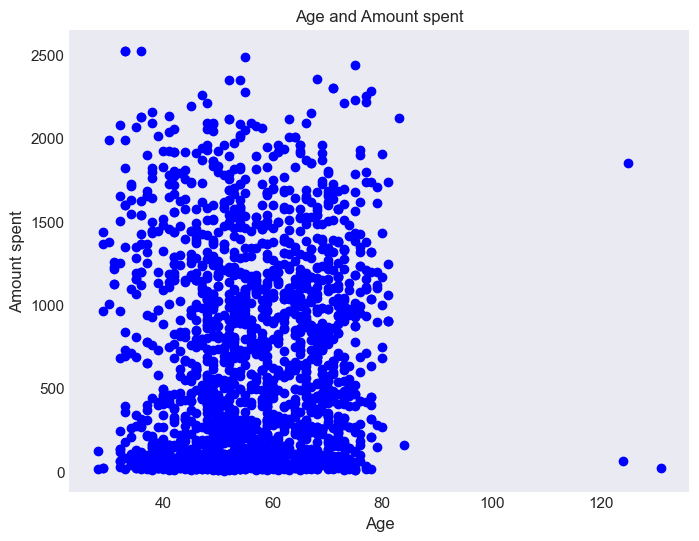

In [128]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['AmountSpent'], color='blue')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Amount spent')
plt.title('Age and Amount spent')

# Displaying the plot
plt.show()

Income and Accepted campaignes

In [129]:
# Creating the plot using plotly express
fig = px.histogram(data, x="Income", color='AcceptedCampaignes' , title='Income and Accepted campaignes')

# Displaying the plot
fig.show()

Age and Income distribution

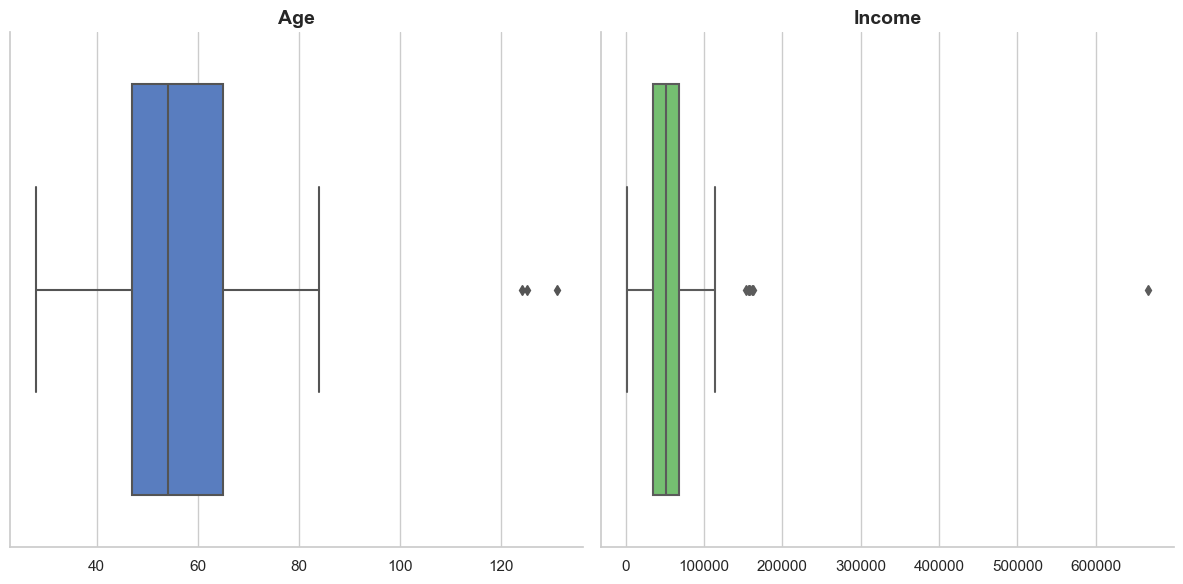

In [130]:
# Seaborn style
sns.set(style='whitegrid')

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Customing colors
age_color = sns.color_palette("muted")[0]
income_color = sns.color_palette("muted")[2]

# Boxplot for Age
sns.boxplot(ax=axes[0], x=data['Age'], color=age_color)
axes[0].set_title('Age', fontsize=14, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Boxplot for Income
sns.boxplot(ax=axes[1], x=data['Income'], color=income_color)
axes[1].set_title('Income', fontsize=14, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Removing top and right spines
sns.despine()

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()

We can notice some outliers from the graphs we plotted that needs to be removed.

# Feature Selection

Dropping redundant attributes

In [131]:
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Z_CostContact', 'Z_Revenue', 'ID', 'Response', 'Complain'], axis = 1, inplace = True)

data.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AmountSpent',
       'NumOfPurchases', 'AcceptedCampaignes', 'Children', 'YearsRegistered'],
      dtype='object')

Encoding categorical features

In [132]:
categorical_features = data.select_dtypes(include='object').columns

le = LabelEncoder()

for column in categorical_features:
    data[column] = le.fit_transform(data[column])

data[categorical_features]

,Education,Marital_Status
0,0,1
1,0,1
2,0,0
3,0,0
4,1,0
...,...,...
2235,0,0
2236,1,0
2237,0,1
2238,1,0


# Handling Outliers

Z-Score method for outliers detection

In [133]:
def remove_outliers_zscore_all_columns(data, threshold=3):
    # Dictionary to store the count of outliers for each column
    outliers_count = {}

    # Loop through all columns
    for column_name in data.columns:
        # Skip non-numeric columns
        if not pd.api.types.is_numeric_dtype(data[column_name]):
            continue

        # Calculating Z-scores for the current column
        column_zscore = (data[column_name] - data[column_name].mean()) / data[column_name].std()
        
        # Identifying and counting outliers
        outliers = data[np.abs(column_zscore) > threshold].index
        outliers_count[column_name] = len(outliers)

        # Removing outliers
        data.drop(outliers, inplace=True)

    # Printing the count of outliers for each column
    for column_name, count in outliers_count.items():
        print(f"Column '{column_name}': {count} outliers removed.")

    # Resetting index after removing rows
    data.reset_index(drop=True, inplace=True)


remove_outliers_zscore_all_columns(data)

Column 'Age': 3 outliers removed.
Column 'Education': 0 outliers removed.
Column 'Marital_Status': 0 outliers removed.
Column 'Income': 8 outliers removed.
Column 'Kidhome': 0 outliers removed.
Column 'Teenhome': 0 outliers removed.
Column 'Recency': 0 outliers removed.
Column 'MntWines': 15 outliers removed.
Column 'MntFruits': 64 outliers removed.
Column 'MntMeatProducts': 49 outliers removed.
Column 'MntFishProducts': 51 outliers removed.
Column 'MntSweetProducts': 64 outliers removed.
Column 'MntGoldProds': 50 outliers removed.
Column 'NumDealsPurchases': 27 outliers removed.
Column 'NumWebPurchases': 0 outliers removed.
Column 'NumCatalogPurchases': 42 outliers removed.
Column 'NumStorePurchases': 0 outliers removed.
Column 'NumWebVisitsMonth': 5 outliers removed.
Column 'AmountSpent': 16 outliers removed.
Column 'NumOfPurchases': 1 outliers removed.
Column 'AcceptedCampaignes': 70 outliers removed.
Column 'Children': 0 outliers removed.
Column 'YearsRegistered': 0 outliers remove

In [134]:
data.isnull().sum().sum()

0

Checking statistics again

In [135]:
data.describe()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AmountSpent,NumOfPurchases,AcceptedCampaignes,Children,YearsRegistered
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,...,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000
mean,54.909766,0.629355,0.348372,46275.013135,0.528270,0.552827,49.097658,220.222159,16.969732,101.215877,...,2.360366,3.715591,1.848087,5.298115,5.693889,410.442033,16.555682,0.129640,1.081097,10.952027
std,11.383039,0.688041,0.476591,18037.103309,0.549468,0.543462,28.814027,271.033447,26.873475,141.657023,...,1.577631,2.563743,2.120861,3.090482,2.088051,449.237206,6.166097,0.336003,0.711732,0.674418
min,28.000000,0.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,8.000000,5.000000,0.000000,0.000000,10.000000
25%,47.000000,0.000000,0.000000,32308.000000,0.000000,0.000000,24.000000,16.000000,1.000000,12.000000,...,1.000000,2.000000,0.000000,3.000000,4.000000,56.500000,12.000000,0.000000,1.000000,10.000000
50%,54.000000,1.000000,0.000000,44989.000000,1.000000,1.000000,50.000000,88.000000,5.000000,38.000000,...,2.000000,3.000000,1.000000,4.000000,6.000000,201.000000,15.000000,0.000000,1.000000,11.000000
75%,64.000000,1.000000,1.000000,60493.000000,1.000000,1.000000,74.000000,363.000000,19.000000,127.000000,...,3.000000,5.000000,3.000000,7.000000,7.000000,681.000000,21.000000,0.000000,1.000000,11.000000
max,84.000000,2.000000,1.000000,90933.000000,2.000000,2.000000,99.000000,1311.000000,142.000000,785.000000,...,8.000000,11.000000,9.000000,13.000000,10.000000,1958.000000,35.000000,1.000000,3.000000,12.000000


Distribution of the continuous variables

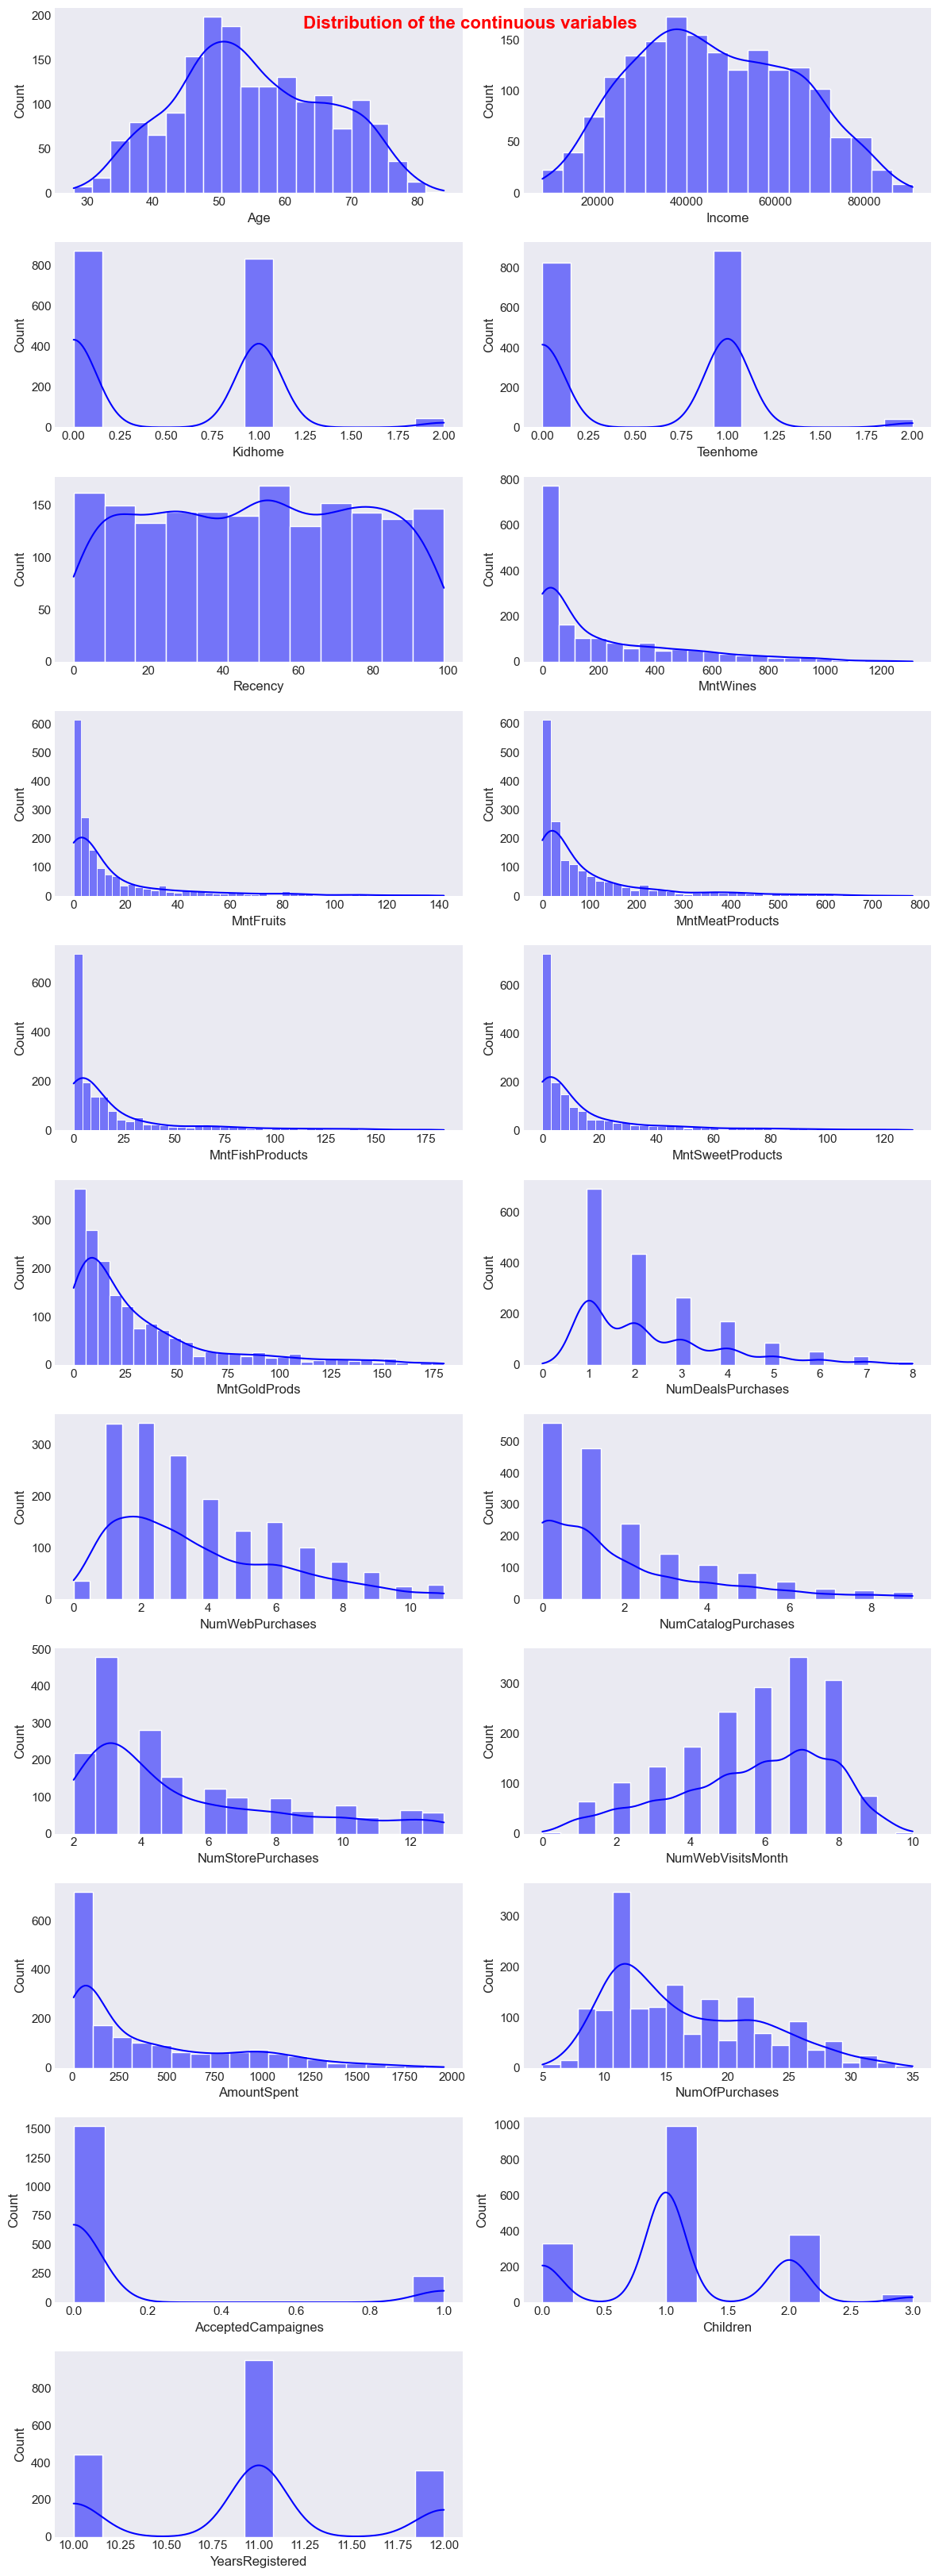

In [136]:
plt.style.use('seaborn-v0_8-dark')
num_features = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(num_features)

num_rows = (num_cols + 1) // 2
num_cols_adjusted = 2 if num_cols > 1 else 1

fig = plt.figure(figsize=(12, 3 * num_rows))
gs = gridspec.GridSpec(num_rows, num_cols_adjusted, width_ratios=[1, 1])

for i, col in enumerate(num_features):
    ax = plt.subplot(gs[i])
    sns.histplot(data=data, x=col, ax=ax, color='blue', kde=True)

plt.suptitle('Distribution of the continuous variables', fontsize=16, fontweight='bold', color='Red')
plt.tight_layout()
plt.show()

# Dimentionality Reduction

Dropping the date column because it will cause us some errors due to its datatype

In [137]:
data = data.drop('Dt_Customer', axis=1)

Feature Scaling

In [138]:
sc = StandardScaler()
data = sc.fit_transform(data)

Plotting Explained Variance to choose the number of dimentions

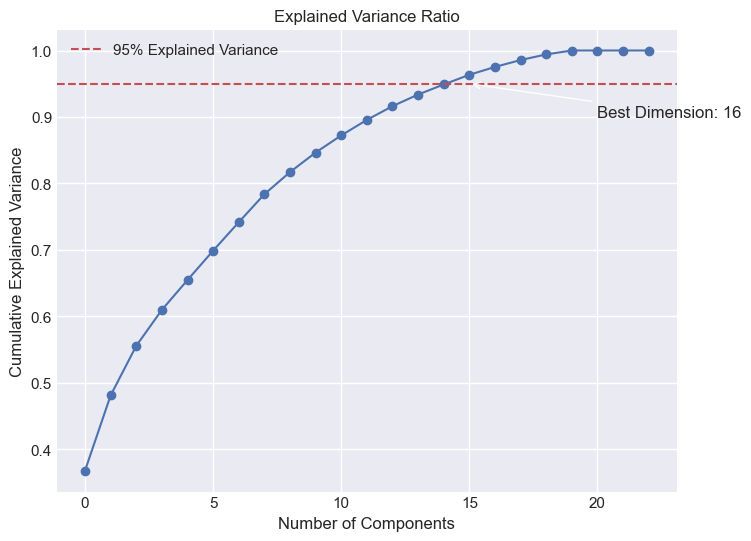

In [139]:
# PCA
pca = PCA()
pca.fit(data)

# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')

threshold = 0.95
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold:.0%} Explained Variance')

best_dimension = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold)

# Annotation
plt.annotate(f'Best Dimension: {best_dimension + 1}',
             xy=(best_dimension, threshold),
             xytext=(best_dimension + 5, threshold - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.grid(True)
plt.legend()
plt.show()

PCA

In [140]:
pca = PCA(n_components=16)
pca_result = pca.fit_transform(data)

Statistics for the top 3 PCA components

In [141]:
# Explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Indices of top 3 components
top_3_indices = np.argsort(explained_variance_ratios)[-3:][::-1]

# Creating the DataFrame
pca_df = pd.DataFrame(data=pca_result[:, top_3_indices], columns=[f'PC{top_3_indices[i]+1}' for i in range(3)])

# Displaying the summary statistics of the DataFrame
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,1751.0,-8.521643e-17,2.910887,-4.005102,-2.474674,-1.077200,2.289827,8.218264
PC2,1751.0,1.623170e-17,1.613179,-4.128084,-1.145082,-0.108111,1.133246,5.924879
PC3,1751.0,-3.652133e-17,1.309691,-3.700999,-0.946041,0.007511,0.926324,3.733916


PCA Projection of Data (Top 3 Principal Components)

In [142]:
# Ploting the top 3 principal components using Plotly
fig = px.scatter_3d(pca_df, x=pca_df.columns[0], y=pca_df.columns[1], z=pca_df.columns[2],
                    title='PCA Projection of Data (Top 3 Principal Components)')

# Showing the plot
fig.show()

# Clustering

I will be applying K-means and Hierarchical Clustering

# Elbow method

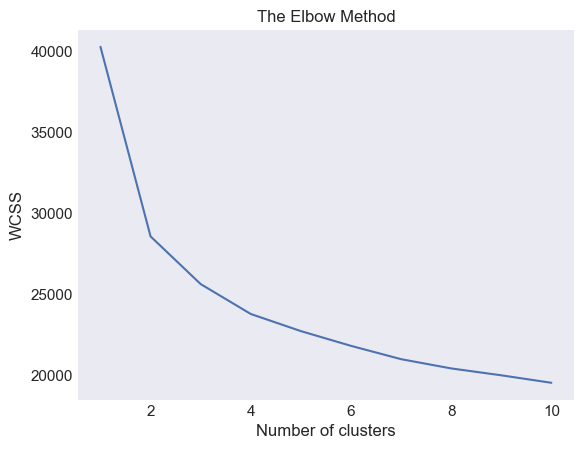

In [143]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering

In [144]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

# Dendogram

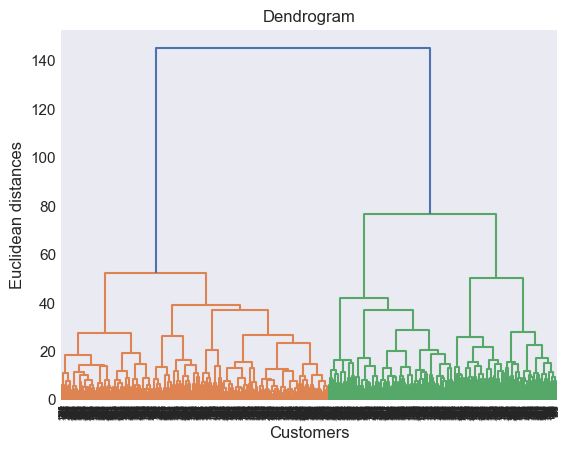

In [145]:
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Hierarchical Clustering

In [146]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data)

# K-Means and Hierarchical Comparison

In [147]:
# Adding cluster labels to the DataFrame
pca_df['Cluster'] = y_kmeans

# Ploting the top 3 principal components with different colors for each cluster using Plotly
fig = px.scatter_3d(pca_df, x=pca_df.columns[0], y=pca_df.columns[1], z=pca_df.columns[2],
                    color='Cluster', title='PCA Projection of Data with K-Means Clusters (Top 3 Principal Components)')

# Showing the plot
fig.show()

In [148]:
# Adding cluster labels to the DataFrame
pca_df['Cluster'] = y_hc

# Ploting the top 3 principal components with different colors for each HCA cluster using Plotly
fig = px.scatter_3d(pca_df, x=pca_df.columns[0], y=pca_df.columns[1], z=pca_df.columns[2],
                    color='Cluster', title='PCA Projection of Data with HCA Clusters (Top 3 Principal Components)')

# Showing the plot
fig.show()

# Cluster Analysis

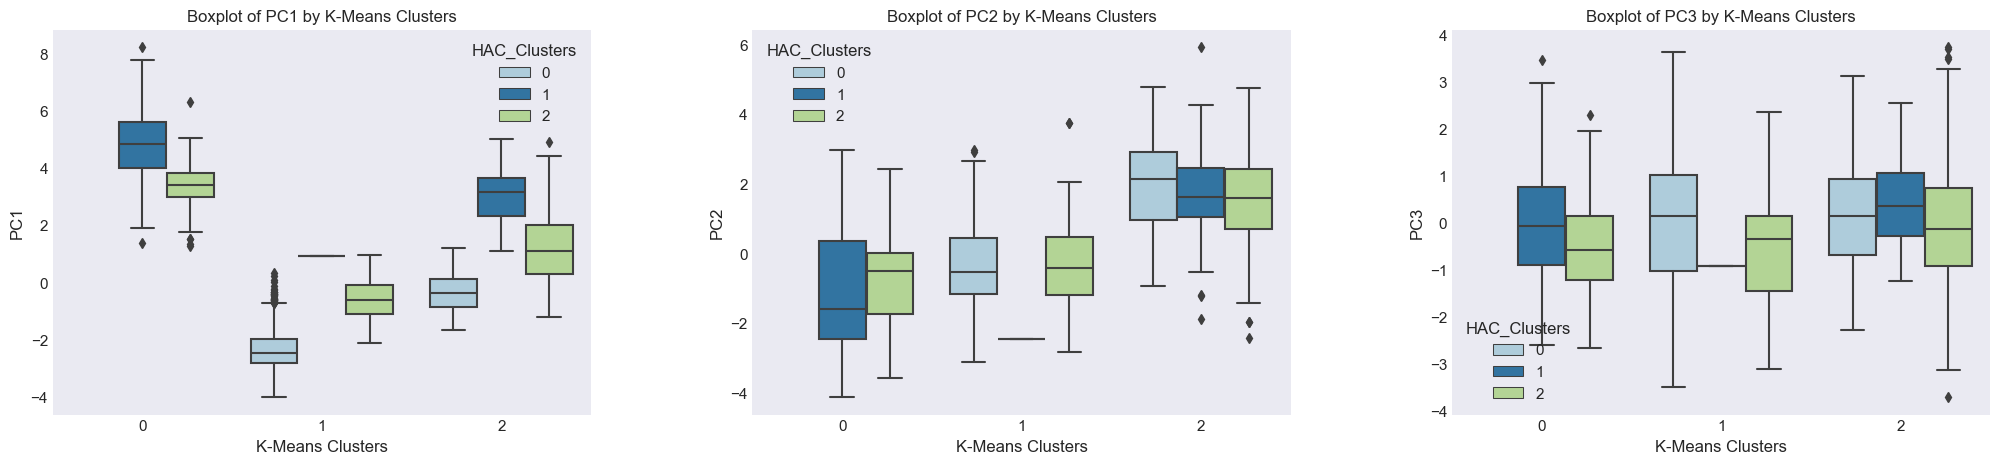

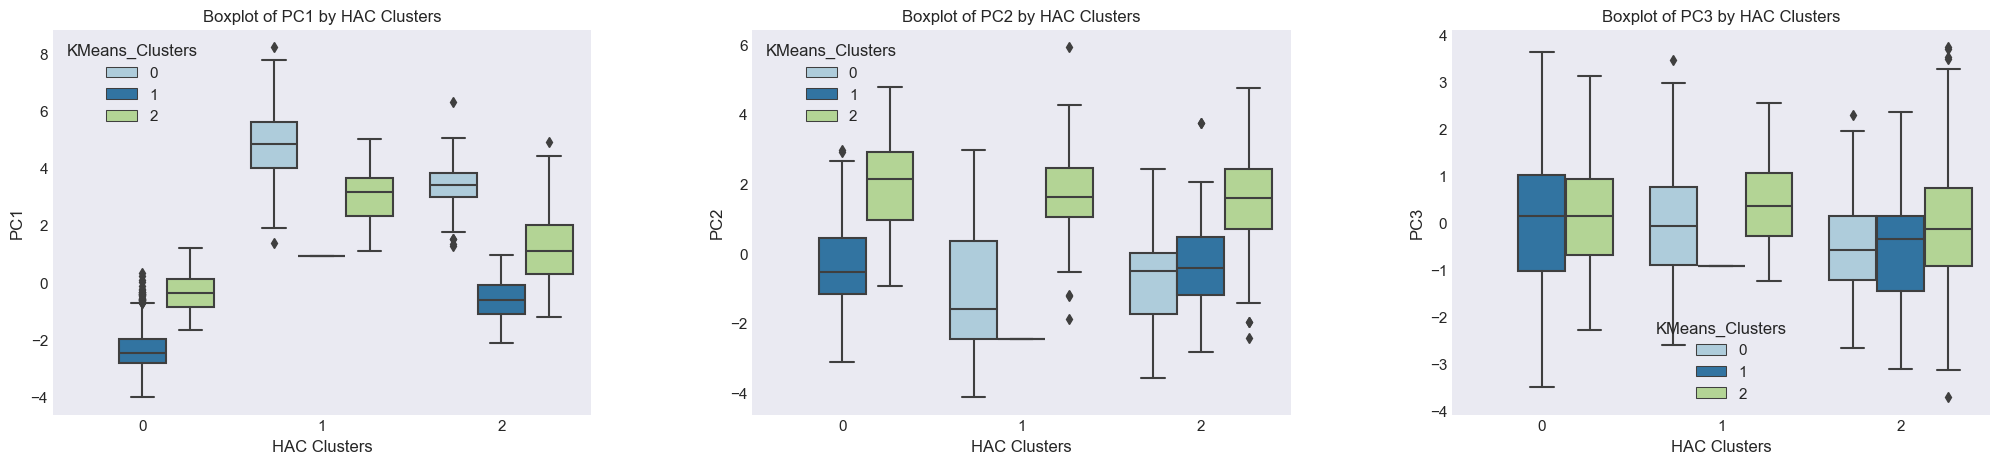

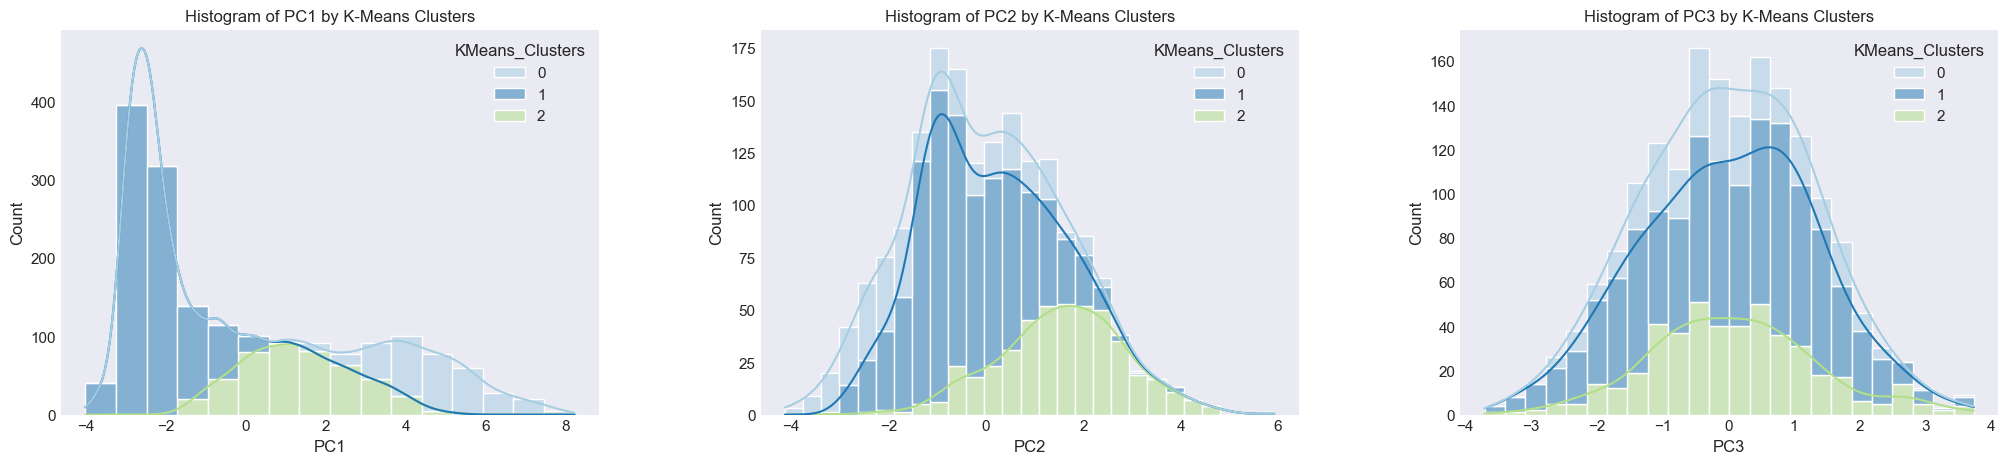

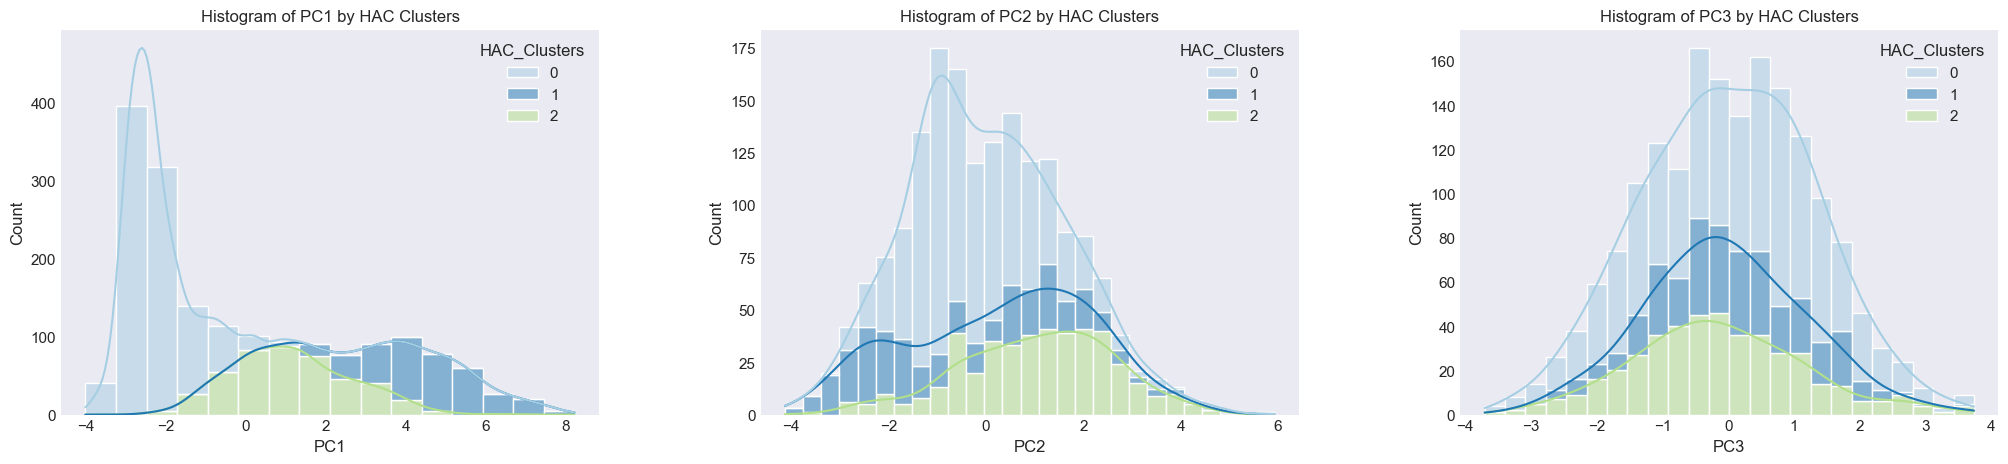

In [152]:
# Adding clustering results to PCA DataFrame
pca_df['KMeans_Clusters'] = y_kmeans
pca_df['HAC_Clusters'] = y_hc

# Selecting the top 3 principal components
top_components = ['PC1', 'PC2', 'PC3']

# Numerical columns that match the top components
num_cols = [col for col in pca_df.columns if np.issubdtype(pca_df[col].dtype, np.number) and col in top_components]

def graph_builder(pca_df):
    def boxplot():
        if not num_cols:
            print("No numerical columns to plot.")
            return
        
        n_cols = len(num_cols)
        rows = n_cols // 3 + (n_cols % 3 > 0)

        # Boxplots for K-Means Clusters
        fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            if col not in top_components:
                continue
            sns.boxplot(
                data=pca_df,
                y=col,
                x="KMeans_Clusters",
                palette="Paired",
                ax=axes.reshape(-1)[num],
                hue="HAC_Clusters",
                dodge=True
            ).set(title=f'Boxplot of {col} by K-Means Clusters',
                  xlabel='K-Means Clusters',
                  ylabel=f'{col}')
        
        # Adjusting the number of subplots
        for ax in axes.reshape(-1)[n_cols:]:
            ax.axis('off')

        plt.show()

        # Boxplots for HAC Clusters
        fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            if col not in top_components:
                continue
            sns.boxplot(
                data=pca_df,
                y=col,
                x="HAC_Clusters",
                palette="Paired",
                ax=axes.reshape(-1)[num],
                hue="KMeans_Clusters",
                dodge=True
            ).set(title=f'Boxplot of {col} by HAC Clusters',
                  xlabel='HAC Clusters',
                  ylabel=f'{col}')
        
        # Adjusting the number of subplots
        for ax in axes.reshape(-1)[n_cols:]:
            ax.axis('off')

        plt.show()
    
    def histplot():
        if not num_cols:
            print("No numerical columns to plot.")
            return
        
        n_cols = len(num_cols)
        rows = n_cols // 3 + (n_cols % 3 > 0)

        # Histograms for K-Means Clusters
        fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            if col not in top_components:
                continue
            sns.histplot(
                data=pca_df,
                x=col,
                hue="KMeans_Clusters",
                multiple="stack",
                kde=True,
                palette="Paired",
                ax=axes.reshape(-1)[num]
            ).set(title=f'Histogram of {col} by K-Means Clusters',
                  xlabel=f'{col}',
                  ylabel='Count')
        
        # Adjusting the number of subplots
        for ax in axes.reshape(-1)[n_cols:]:
            ax.axis('off')

        plt.show()

        # Histograms for HAC Clusters
        fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(25, 5 * rows))
        plt.subplots_adjust(wspace=0.3, hspace=0.4)
        for num, col in enumerate(num_cols):
            if col not in top_components:
                continue
            sns.histplot(
                data=pca_df,
                x=col,
                hue="HAC_Clusters",
                multiple="stack",
                kde=True,
                palette="Paired",
                ax=axes.reshape(-1)[num]
            ).set(title=f'Histogram of {col} by HAC Clusters',
                  xlabel=f'{col}',
                  ylabel='Count')
        
        # Adjusting the number of subplots
        for ax in axes.reshape(-1)[n_cols:]:
            ax.axis('off')

        plt.show()
    

    boxplot()
    histplot()
    

graph_builder(pca_df)